# Fathers and Sons on the Career Ladder
Occupation in group of upper(u), middle(m) and lower(l).  Subscripts index the generation. 

The following table gives conditional probabilities, for example $P(U_2|U_1) = 0.45$

|     |$U_2$|$M_2$|$L_2$|
|-----|-----|-----|-----|
|$U_1$|0.45 |0.48 |0.07 |
|$M_1$|0.05 |0.70 |0.25 |
|$L_1$|0.01 |0.50 |0.49 |

Suppose that of the father’s generation 10% are in U, 40% in M, and 50% in L.

* Q1.  What is the probability that a son in the next generation is in U? Analoguously in M, or L?

  Using the law of total probability we get: 
  
  $P(U_2)=P(U_2|U_1)*P(U_1)+P(U_2|M_1)*P(M_1)+P(U_2|L_1)*P(L_1)=0.45*0.1+0.05*0.4+0.01*0.5=0.07$
  
  Similarly we get $P(M_2)=0.48*0.1+0.70*0.4+0.50*0.5=0.578$ and $P(L_2)=0.352$ (Alternatively $P(L_2)=1-P(U_2)-P(M_2)$)
  

* Q2.  If a son has occupational status U2, what is the probability that his father had occupational status U1? Analoguously M1, or L1?

  Using the formular of joint probabilty we get $P(U_1|U_2)=\frac{P(U_1)*P(U_2|U_1)}{P(U_2)}=\frac{0.10*0.45}{0.07}\approx 0.643$
  
  Similarly we get $P(M_1|U_2)=\frac{0.40*0.05}{0.07}\approx 0.286$ and $P(L_1|U_2)\approx 0.071$(Alternatively $P(L_1|U_2)=1-P(U_1|U_2)-P(M_1|U_2)$)

# The Unavoidable Drawing from a Box (or urn) 

There's a box with N marbles, of which M are black(b) and the rest are white(w).

* Q1.  What is the probability that you draw a black marble on the ﬁrst draw?

  The probabilty equals to the proportion of black marble in all marbles: $P(b)=\frac{\#(b)}{\#(total)}=\frac{M}{N}$


* Q2. What is the probability that you draw a black marble on the second draw, if you know that a black marble was drawn on the ﬁrst draw and not replaced?

  After drawing out a black marble we have one less: $P(b|b)=\frac{\#(b)-1}{\#(total)-1}=\frac{M-1}{N-1}$


* Q3. What is now the probability that you draw a black marble on the second draw if you are not told what colour was picked on the ﬁrst draw (and that ﬁrst marble was also not replaced)? Hint: The result is counter-intuitive. Apply the law of total probability!

  $P'(b)=P(b)*P(b|b)+P(w)*P(b|w)=\frac{M*(M-1)}{N*(N-1)}+\frac{(N-M)*M}{N*(N-1)}=\frac{M}{N}$


# A Small Pictoral Atlas of Propability Distributions

We investigate various (univariate) probability distributions: Poisson, Beta, $\chi^2$

* General information of these distributions: 
 
|Distribution|PDF|contin./disc.|domain of definition|expectation value|variance|
|------------|---|-------------|------|-----------|--------|-------------|
|Poisson     | $\frac{\lambda^k e^{-\lambda}}{k!}$                  |discrete|$k\in\mathbb{N_0}$|$\lambda$|$\lambda$|
|Beta        | $\frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}$|continuous|$x\in[0,1]$|$\frac{\alpha}{\alpha+\beta}$|$\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$|
|$\chi^2$    | $\frac{1}{2^{k/2} \Gamma(k/2)} x^{k/2 -1}e^{-x/2}$   |continuous|$x\in[0,+\infty]$|$k$|$2k$|
  
  where $B(\alpha,\beta)=\frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha + \beta)}$. The Gamma Function is defined as $\Gamma(n)=(n-1)!$ if n is a positive integer, generally $\Gamma(x)=\int_{0}^{\infty}x^{z-1}e^{-x}dx$.  For $\chi^2$ if $k=1,0$ is not allowed in the domain.

* The poisson distribution gives the probability of $k$ events occurring in a fixed interval of time or space. Each event occurs with a known constant rate and they are mutually independent.
  
  The beta distribtution is a family of continuous probability distribution defined on [0, 1] with two parameters $\alpha$ and $\beta$. It can be used to model the behavio of random variables that has a limited range.
  
  The $\chi^2$ distribution gives the distribution of sum of $k$ independent standard normal random variables. 
  

* Then we create ﬁgures illustrating their dependence on parameters

Try to write a code suﬃciently general being able to handle all cases.

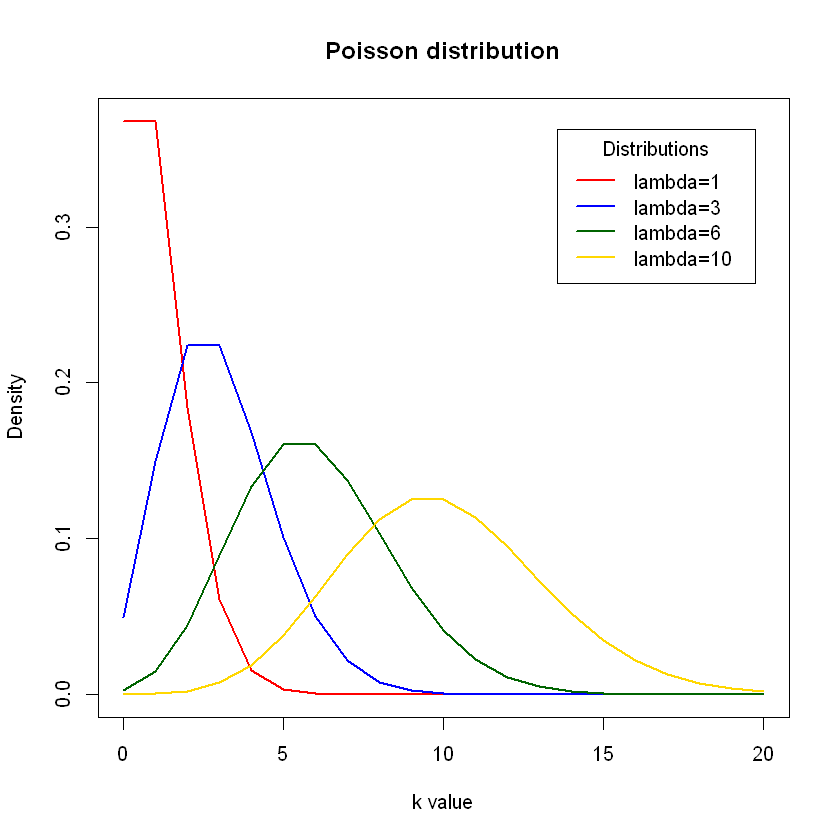

In [1]:
# Poisson distribution
k <- seq(0, 20, 1)
lambda <- c(1, 3, 6, 10)

colors <- c("red", "blue", "darkgreen", "gold")

plot(k, dpois(k, 1), type="l", lty=2, xlab="k value", ylab="Density", main="Poisson distribution")

for (i in 1:4){
  lines(k, dpois(k,lambda[i]), lwd=2, col=colors[i])
}

legend("topright", inset=.05, title="Distributions",
  c("lambda=1", "lambda=3", "lambda=6", "lambda=10"),  lwd=2, lty=c(1, 1, 1, 1), col=colors)

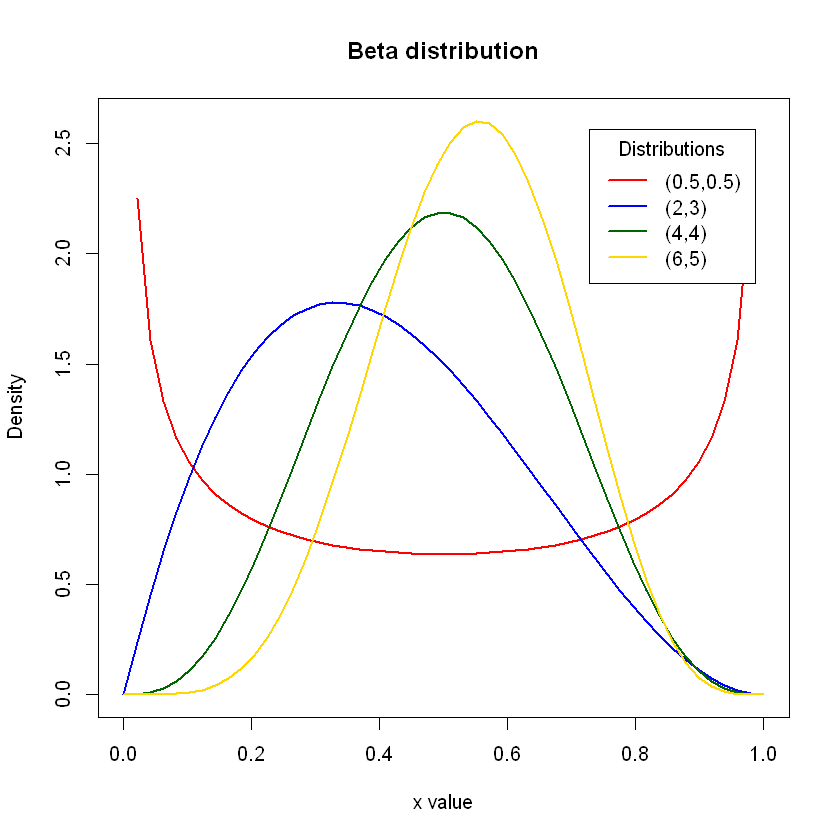

In [2]:
# Beta distribution
x <- seq(0, 1, length=50)
a <- c(0.5, 2, 4, 6)
b <- c(0.5, 3, 4, 5)

colors <- c("red", "blue", "darkgreen", "gold")

plot(x, dbeta(x,6,5), type="l", lty=2, xlab="x value", ylab="Density", main="Beta distribution")

for (i in 1:4){
  lines(x, dbeta(x,a[i],b[i]), lwd=2, col=colors[i])
}

legend("topright", inset=.05, title="Distributions",
  c("(0.5,0.5)", "(2,3)", "(4,4)", "(6,5)"),  lwd=2, lty=c(1, 1, 1, 1), col=colors)

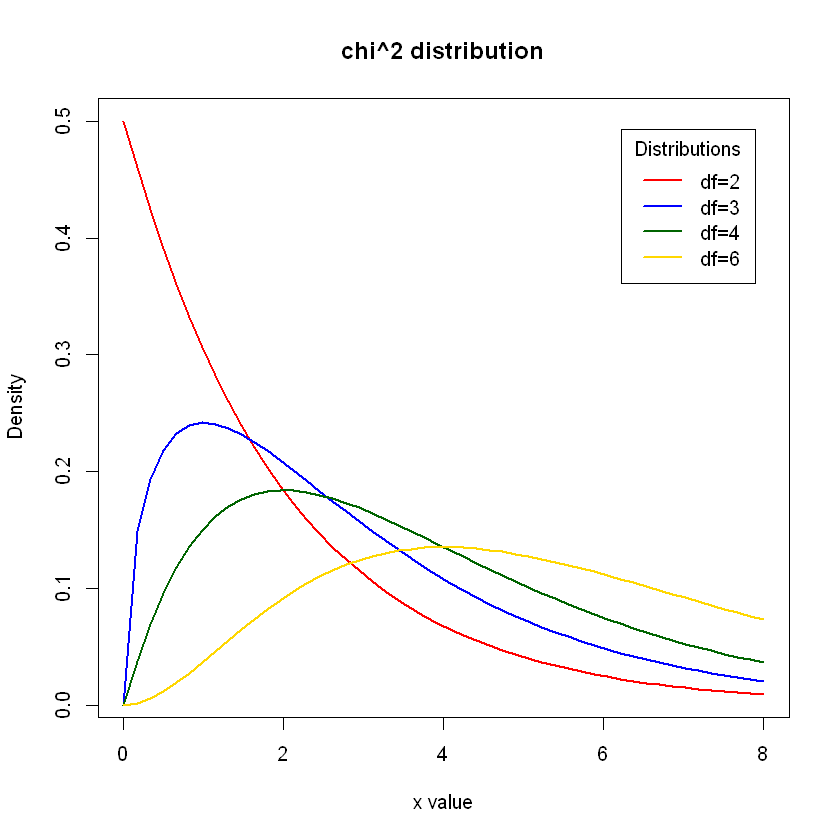

In [11]:
# chi^2 distribution
y <- seq(0, 8, length=50)
df <- c(2,3,4,6)
colors <- c("red", "blue", "darkgreen", "gold")

plot(y, dchisq(y, df=2), type="l", lty=2, xlab="x value", ylab="Density", main="chi^2 distribution")

for (i in 1:4){
  lines(y, dchisq(y,df[i]), lwd=2, col=colors[i])
}

legend("topright", inset=.05, title="Distributions",
  c("df=2","df=3","df=4","df=6"),  lwd=2, lty=c(1, 1, 1, 1), col=colors)